### Bike sharing demand  
这是一个城市自行车租赁系统，提供的数据为2年内华盛顿按小时记录的自行车租赁数据，其中训练集由每个月的前19天组成，测试集由20号之后的时间组成（需要我们自己去预测）。
  https://www.kaggle.com/c/bike-sharing-demand

In [49]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from matplotlib import  pyplot as plt
import seaborn as sns

#### 1.数据读取

In [50]:
train_data=pd.read_csv('./bike-sharing-demand/train.csv')
test_data=pd.read_csv('./bike-sharing-demand/test.csv')

In [51]:
train_data.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0,0,0,0,0
casual,3,8,5,3,0


In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [53]:
test_data.head().T

,0,1,2,3,4
datetime,2011-01-20 00:00:00,2011-01-20 01:00:00,2011-01-20 02:00:00,2011-01-20 03:00:00,2011-01-20 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,1,1,1,1,1
weather,1,1,1,1,1
temp,10.66,10.66,10.66,10.66,10.66
atemp,11.365,13.635,13.635,12.88,12.88
humidity,56,56,56,56,56
windspeed,26.0027,0,0,11.0014,11.0014


In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


#### 2.数据清洗

In [55]:
# 查看缺失情况以及
pd.isnull(train_data).sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [56]:
pd.isnull(test_data).sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [57]:
# 错误值查询
len(train_data[(train_data['casual']+train_data['registered'])!=train_data['count']])
# 查看注册用户+未注册用户总和与总用户是否一致


0

#### 3.特征可视化分析

(1)定量特征分析

目标特征

In [58]:
count_=['count','casual','registered']
train_data[count_].describe()

,count,casual,registered
count,10886.000000,10886.000000,10886.000000
mean,191.574132,36.021955,155.552177
std,181.144454,49.960477,151.039033
min,1.000000,0.000000,0.000000
25%,42.000000,4.000000,36.000000
50%,145.000000,17.000000,118.000000
75%,284.000000,49.000000,222.000000
max,977.000000,367.000000,886.000000


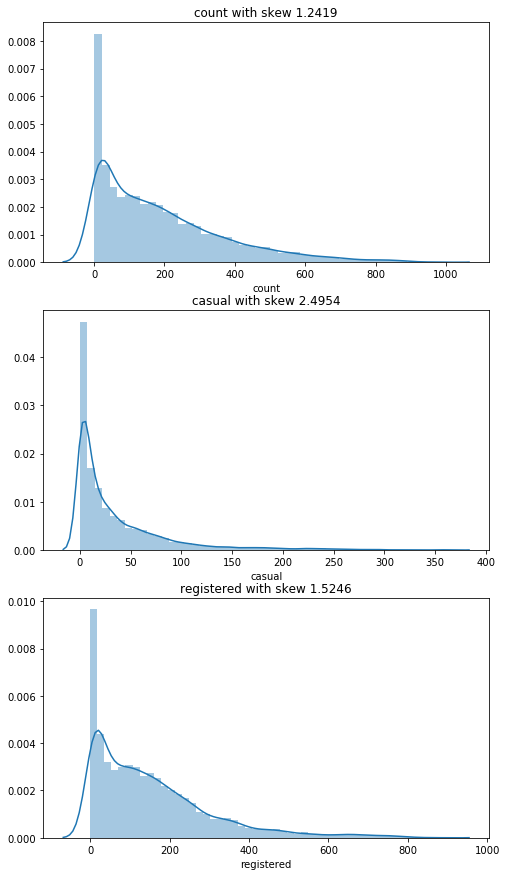

In [59]:
from scipy.stats import skew 
fig,(ax0,ax1,ax2)=plt.subplots(3,1,figsize=(8,15))
sns.distplot(train_data['count'],ax=ax0)
ax0.set_title('count with skew {:.4f}'.format(skew(train_data['count'])))
sns.distplot(train_data['casual'],ax=ax1)
ax1.set_title('casual with skew {:.4f}'.format(skew(train_data['casual'])))
sns.distplot(train_data['registered'],ax=ax2)
ax2.set_title('registered with skew {:.4f}'.format(skew(train_data['registered'])))
plt.show()

目标特征数据严重右偏，可以使用log处理。

In [60]:
train_data[count_]=train_data[count_].applymap(lambda x:np.log1p(x))

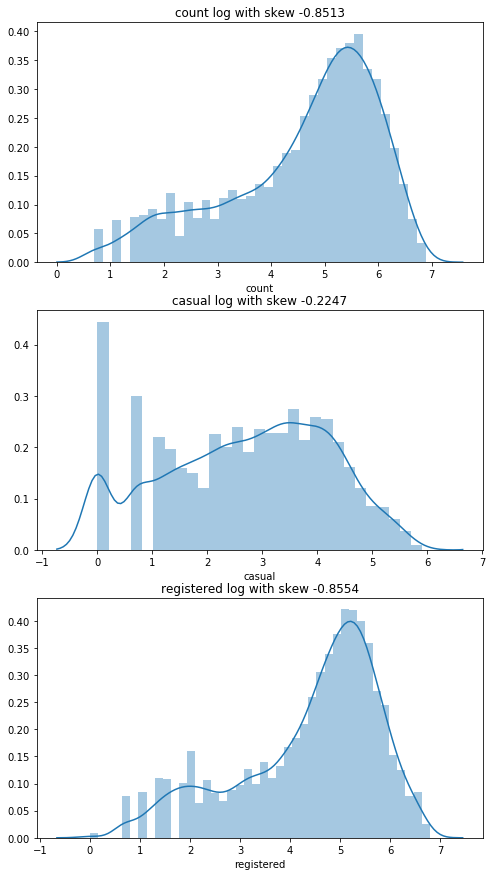

In [61]:
fig,(ax0,ax1,ax2)=plt.subplots(3,1,figsize=(8,15))
sns.distplot(train_data['count'],ax=ax0)
ax0.set_title('count log with skew {:.4f}'.format(skew(train_data['count'])))
sns.distplot(train_data['casual'],ax=ax1)
ax1.set_title('casual log with skew {:.4f}'.format(skew(train_data['casual'])))
sns.distplot(train_data['registered'],ax=ax2)
ax2.set_title('registered log with skew {:.4f}'.format(skew(train_data['registered'])))
plt.show()

temp,atemp,humidity,windspeed


In [62]:
data=train_data.append(test_data)
data.reset_index(drop=True,inplace=True)
data.shape

(17379, 12)

In [63]:
data.head().append(data.tail()).T

,0,1,2,3,4,17374,17375,17376,17377,17378
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00,2012-12-31 19:00:00,2012-12-31 20:00:00,2012-12-31 21:00:00,2012-12-31 22:00:00,2012-12-31 23:00:00
season,1,1,1,1,1,1,1,1,1,1
holiday,0,0,0,0,0,0,0,0,0,0
workingday,0,0,0,0,0,1,1,1,1,1
weather,1,1,1,1,1,2,2,1,1,1
temp,9.84,9.02,9.02,9.84,9.84,10.66,10.66,10.66,10.66,10.66
atemp,14.395,13.635,13.635,14.395,14.395,12.88,12.88,12.88,13.635,13.635
humidity,81,80,80,75,75,60,60,60,56,65
windspeed,0,0,0,0,0,11.0014,11.0014,11.0014,8.9981,8.9981
casual,1.38629,2.19722,1.79176,1.38629,0,NaN,NaN,NaN,NaN,NaN


In [64]:
others=['temp','atemp','humidity','windspeed']
data[others].describe()

,temp,atemp,humidity,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


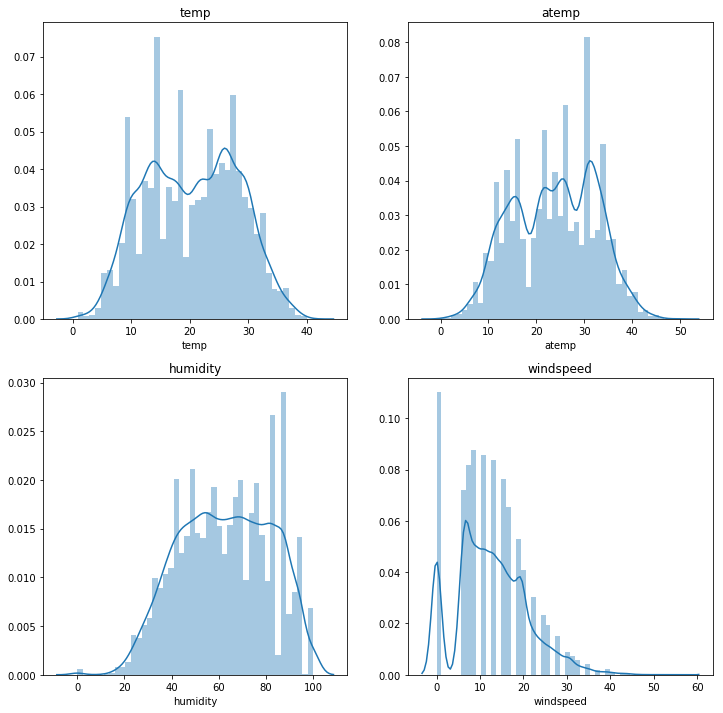

In [65]:
fig,(axes)=plt.subplots(2,2,figsize=(12,12))
sns.distplot(data['temp'],ax=axes[0][0])
axes[0][0].set_title('temp')
sns.distplot(data['atemp'],ax=axes[0][1])
axes[0][1].set_title('atemp')
sns.distplot(data['humidity'],ax=axes[1][0])
axes[1][0].set_title('humidity')
sns.distplot(data['windspeed'],ax=axes[1][1])
axes[1][1].set_title('windspeed')
plt.show()

数据分布几乎符合正态，可不做进一步处理

进一步查看与目标特征之间的关系

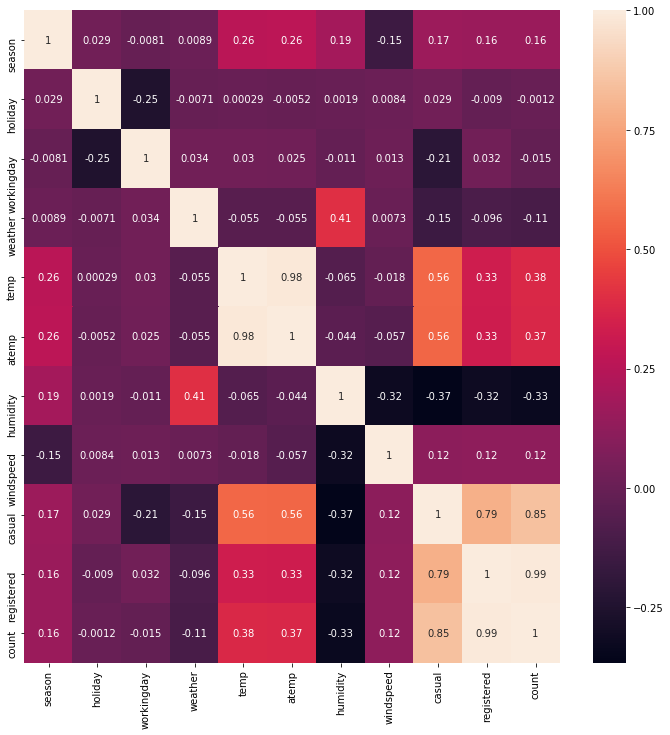

In [66]:
# 相关性查看
data_corr=data[data['count'].notnull()].corr()

plt.figure(figsize=(12,12))
sns.heatmap(data_corr,annot=True)
plt.show()

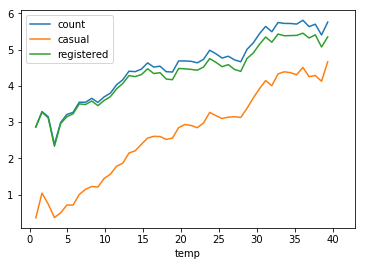

In [67]:
data.groupby('temp')[count_].mean().plot.line()

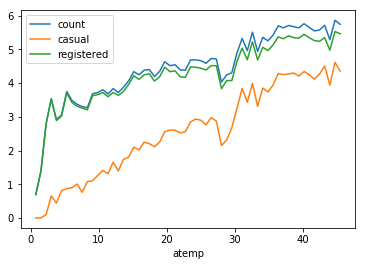

In [68]:
data.groupby('atemp')[count_].mean().plot.line()

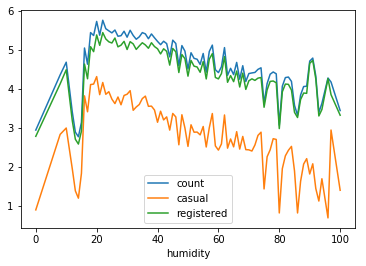

In [69]:
data.groupby('humidity')[count_].mean().plot.line()

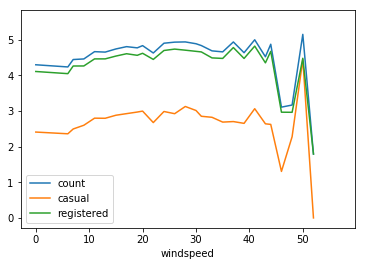

In [70]:
data.groupby('windspeed')[count_].mean().plot.line()

三者的趋势还是比较相近的

(2)定性特征分析

In [71]:
date=pd.to_datetime(data['datetime'])
data['year']=date.dt.year
data['month']=date.dt.month
data['day']=date.dt.day
data['hour']=date.dt.hour
data['weekday']=date.dt.weekday

In [72]:
data.head(5).T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0,0,0,0,0
casual,1.38629,2.19722,1.79176,1.38629,0


year,month,day,hour,weekday,season,holiday,workingday,weather

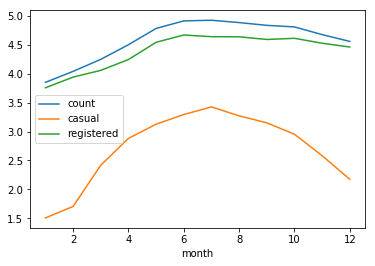

In [73]:
data.groupby('month')[count_].mean().plot.line()

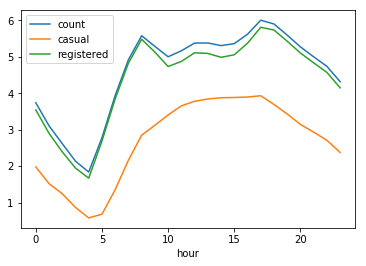

In [74]:
data.groupby('hour')[count_].mean().plot.line()

此处总人数与注册人数在早晚高峰都是最大，未注册人数在10-15之间有最大值。


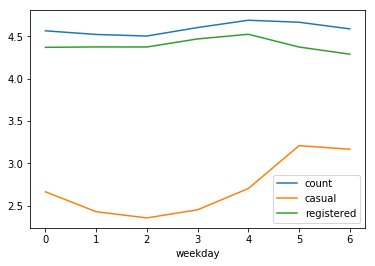

In [75]:
data.groupby('weekday')[count_].mean().plot.line()

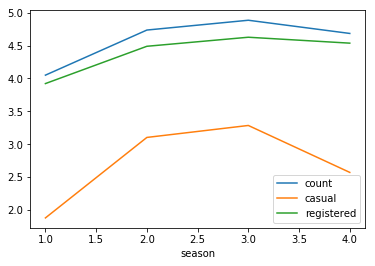

In [76]:
data.groupby('season')[count_].mean().plot.line()

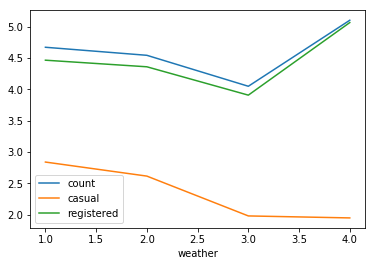

In [77]:
data.groupby('weather')[count_].mean().plot.line()

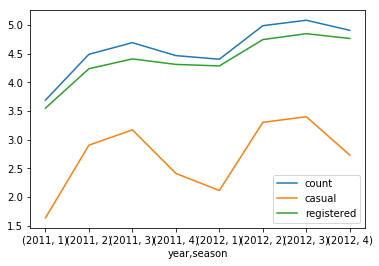

In [78]:
data.groupby(['year','season'])[count_].mean().plot.line()

Text(0.5, 1.0, 'working')

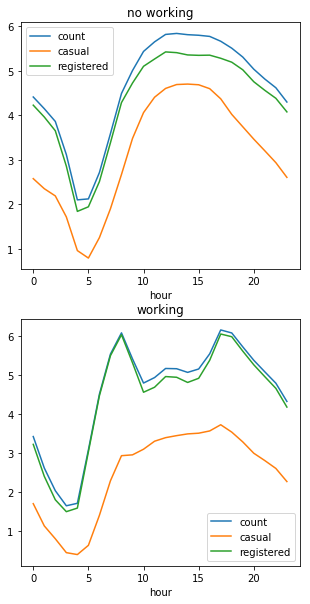

In [79]:
data_noworking=data[data['workingday']==0]
data_working=data[data['workingday']==1]

fig,(ax0,ax1)=plt.subplots(2,1,figsize=(5,10))
data_noworking.groupby('hour')[count_].mean().plot.line(ax=ax0)
ax0.set_title('no working')
data_working.groupby('hour')[count_].mean().plot.line(ax=ax1)
ax1.set_title('working')

Text(0.5, 1.0, 'holiday')

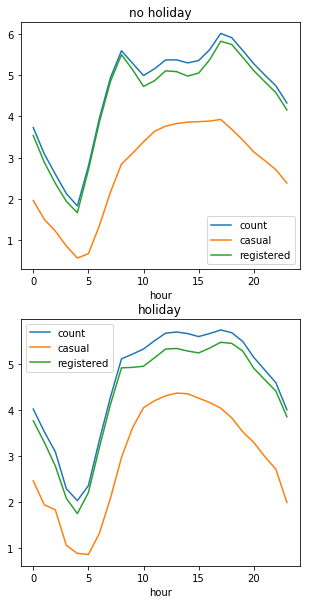

In [80]:
data_noholiday=data[data['holiday']==0]
data_holiday=data[data['holiday']==1]

fig,(ax0,ax1)=plt.subplots(2,1,figsize=(5,10))
data_noholiday.groupby('hour')[count_].mean().plot.line(ax=ax0)
ax0.set_title('no holiday')
data_holiday.groupby('hour')[count_].mean().plot.line(ax=ax1)
ax1.set_title('holiday')

从定性分析来看，'count','casual','registered'三个量的变化还是有些许区别的，
故模型预测可有两种思路：直接预测count；分别预测'casual','registered'，然后
相加得到最后count（个人认为此处可以建立线性回归，因为log量registered与count
值比较接近，可自行学习权重）。

#### 4.特征工程与模型训练预测

In [81]:
# 温度与体感温度趋势与数值都较为相近，相关度也较高，故可以合并取均值
data['temp']=(data['temp']+data['atemp'])/2

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  year        17379 non-null  int64  
 13  month       17379 non-null  int64  
 14  day         17379 non-null  int64  
 15  hour        17379 non-null  int64  
 16  weekday     17379 non-null  int64  
dtypes: float64(6), int64(10), object(1)
memory usage: 2.3+ MB


In [83]:
features=['season','holiday','workingday','weather','temp',
          'humidity','windspeed','year','month','day','hour',
          'weekday']

In [84]:
train_data=data[data['count'].notnull()]
test_data=data[data['count'].isnull()]

train_x=train_data[features]
train_y=train_data['count']

test_x=test_data[features]



In [85]:
import xgboost as xgb
dtrain=xgb.DMatrix(train_x,train_y)

params={
    'booster':'gbtree',
    'objective':'reg:squarederror',
    'eval_metric':'rmse',
    'eta':0.1,
    'max_depth':10,
    'max_child_weight':1,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.8,
    'silent':True,
    'seed':78,
    'nthread':4
}

cv_result=xgb.cv(params,dtrain,num_boost_round=300,nfold=5,early_stopping_rounds=10,seed=78,show_stdv=False)


[16:11:55] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:11:55] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:11:55] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Para

In [86]:
cv_result

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.906079,0.005774,3.906574,0.023373
1,3.524243,0.005297,3.525223,0.021088
2,3.184781,0.012176,3.186899,0.013198
3,2.878791,0.011868,2.882299,0.013713
4,2.608251,0.020929,2.613719,0.017944
...,...,...,...,...
232,0.112119,0.000689,0.282726,0.009843
233,0.112080,0.000689,0.282720,0.009840
234,0.112043,0.000707,0.282714,0.009844
235,0.112009,0.000707,0.282715,0.009843


In [87]:
xgb_model=xgb.train(params,dtrain,num_boost_round=cv_result.shape[0])
dtest=xgb.DMatrix(test_x)
pred=xgb_model.predict(dtest)

[16:12:01] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [88]:
test_data['count']=np.expm1(pred)
result = test_data[['datetime', 'count']].copy()
result.to_csv('result1.csv', index=False)

In [89]:
train_y1=train_data['casual']
train_y2=train_data['registered']

In [90]:
dtrain=xgb.DMatrix(train_x,train_y1)
cv_result=xgb.cv(params,dtrain,num_boost_round=200,nfold=5,early_stopping_rounds=10,seed=78,show_stdv=False)

xgb_model=xgb.train(params,dtrain,num_boost_round=cv_result.shape[0])
dtest=xgb.DMatrix(test_x)
pred1=xgb_model.predict(dtest)

[16:12:03] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:12:03] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:12:03] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Para

In [91]:
dtrain=xgb.DMatrix(train_x,train_y2)
cv_result=xgb.cv(params,dtrain,num_boost_round=200,nfold=5,early_stopping_rounds=10,seed=78,show_stdv=False)

xgb_model=xgb.train(params,dtrain,num_boost_round=cv_result.shape[0])
dtest=xgb.DMatrix(test_x)
pred2=xgb_model.predict(dtest)

[16:12:06] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:12:06] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Parameters: { max_child_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:12:06] WARNING: D:\Build\xgboost\xgboost-1.1.0.git\python-package\build\temp.win-amd64-3.7\Release\xgboost\src\learner.cc:480: 
Para

In [92]:
test_data['count']=np.expm1(pred1)+np.expm1(pred2)
result = test_data[['datetime', 'count']].copy()
result.to_csv('result2.csv', index=False)

In [93]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf' : 10, 'learning_rate': 0.1, 'subsample': 0.7, 'loss': 'ls'}
gbm_model = GradientBoostingRegressor(**params)

gbm_model.fit(train_x,train_y)
pred=gbm_model.predict(test_x)

test_data['count']=np.expm1(pred)
result = test_data[['datetime', 'count']].copy()
result.to_csv('result3.csv', index=False)




